<a href="https://colab.research.google.com/github/BirenderPanwar/EVA4_Phase1/blob/master/session12/assignment_B/EVA4S12_Assignment_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment B:
1. Download 50 images of dogs. 
2. Use VGA tool to annotate bounding boxes around the dogs.
3. Download JSON file. 
4. Describe the contents of this JSON file in FULL details 
5. Find out the best total numbers of clusters. Upload link to your Colab File uploaded to GitHub. 

In [0]:
# import all necessary packages
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### 1. Read the COCO Json and get image dimension and bbox details

In [0]:
coco_json_file = "dog_coco_json.json"

In [0]:
import json

json_file = open(coco_json_file)
json_string = json_file.read() 
json_data = json.loads (json_string) 

images = json_data ["images"]
annotations = json_data ["annotations"]

In [0]:
# collect all the image information: image dimention and bbox details
image_data = []
for i in np.arange(50):
    item = [images[i]["file_name"], images[i]["width"], images[i]["height"]]
    item.extend(annotations[i]["bbox"])
    image_data.append(item)

In [0]:
'''
"file_name": image file name 
"img_h": height of the image in pixel
"img_w": width of the image in pixel
"bbox_x": x position - center of the bounding box 
"bbox_y": y position - center of the bounding box 
"bbox_h": height of the bounding box
"bbox_w": width of the bounding box
'''
col_names = ["file_name", "img_h", "img_w", "bbox_x", "bbox_y", "bbox_h", "bbox_w"]
df_data = pd.DataFrame(data=image_data, columns=col_names)
df_data

,file_name,img_h,img_w,bbox_x,bbox_y,bbox_h,bbox_w
0,images1.jpg,212,238,9,160,94,63
1,images2.jpg,300,168,61,6,191,88
2,images3.jpg,251,201,26,34,190,142
3,images4.jpg,275,184,101,22,153,160
4,images5.jpg,311,162,36,29,163,129
5,images6.jpg,225,225,64,7,146,205
6,images7.jpg,275,183,124,63,108,118
7,images8.jpg,300,168,70,11,149,155
8,images9.jpg,275,183,19,18,248,141
9,images10.jpg,300,168,84,4,202,158


In [0]:
print("Shape: ", df_data.shape)

Shape:  (50, 7)


# Normalizing images and bbox

To make all the bounding boxes parameter to be comparable we will normalize all the images to 1X1.
Now we get the new bbox parametrs by dividing with the respective image height and width as below:

- bbox_x_new = bbox_x / img_w  {divided by width of the image}
- bbox_y_new = bbox_y / img_h  {divided by heigth of the image}
- bbox_h_new = bbox_h / img_h  {divided by width of the image}
- bbox_w_new = bbox_w / img_w  {divided by heigth of the image}

In [0]:
df_data["img_h_new"] = df_data["img_h"] / df_data["img_h"]
df_data["img_w_new"] = df_data["img_w"] / df_data["img_w"]

df_data["bbox_x_new"] = df_data["bbox_x"] / df_data["img_w"]
df_data["bbox_y_new"] = df_data["bbox_y"] / df_data["img_h"]
df_data["bbox_h_new"] = df_data["bbox_h"] / df_data["img_h"]
df_data["bbox_w_new"] = df_data["bbox_w"] / df_data["img_w"]

df_data.head()

,file_name,img_h,img_w,bbox_x,bbox_y,bbox_h,bbox_w,img_h_new,img_w_new,bbox_x_new,bbox_y_new,bbox_h_new,bbox_w_new
0,images1.jpg,212,238,9,160,94,63,1.0,1.0,0.037815,0.754717,0.443396,0.264706
1,images2.jpg,300,168,61,6,191,88,1.0,1.0,0.363095,0.020000,0.636667,0.523810
2,images3.jpg,251,201,26,34,190,142,1.0,1.0,0.129353,0.135458,0.756972,0.706468
3,images4.jpg,275,184,101,22,153,160,1.0,1.0,0.548913,0.080000,0.556364,0.869565
4,images5.jpg,311,162,36,29,163,129,1.0,1.0,0.222222,0.093248,0.524116,0.796296


In [0]:
df_bbox = df_data[["bbox_h_new","bbox_w_new"]]
df_bbox.head()

,bbox_h_new,bbox_w_new
0,0.443396,0.264706
1,0.636667,0.523810
2,0.756972,0.706468
3,0.556364,0.869565
4,0.524116,0.796296


### K-Mean Clustering

1. Determine the Anchor boxes using K-Mean clustering on Bounding box heights and weights
2. Iterating values of k from 1 to 10 fit K means model
3. Using c distance - Get the measure for Sum of squares error.
4. draw elbow plot and get the optimal K from graph

In [0]:
from sklearn.cluster import KMeans

# this array is used to draw elbow plot to determin the optimum cluster K value
distortion = []

cluster_range = range(1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_bbox)
  distortion.append(clusters.inertia_)    # capture the intertia
  

# combine the cluster_range and distortion into a dataframe by combining them
clusters_df = pd.DataFrame( {"num_clusters":cluster_range, "distortion": distortion} )
clusters_df[0:15]

,num_clusters,distortion
0,1,2.652851
1,2,1.393863
2,3,0.948651
3,4,0.657394
4,5,0.512678
5,6,0.405948
6,7,0.325235
7,8,0.252316
8,9,0.212917


### Plotting Elbow Plot and find optimal K

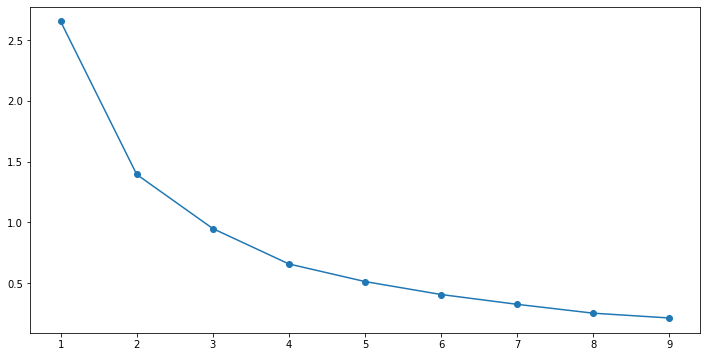

In [0]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.xlabel = "Number of clusters"
plt.ylabel = "distortion"
plt.plot(cluster_range, distortion, marker = "o" )

In [0]:
# as per elbow plot, optimal value of K is 3 as beyond this value distorion does not change much.
optimal_k = 3

### Find centroid values for optimal K and map all the images to their respectibe cluster

In [0]:
clusters = KMeans(optimal_k, random_state = 1, n_init = 5)
clusters.fit(df_bbox)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
# Get the centroids of the cluster.... using function cluster_centers_
centroids = clusters.cluster_centers_
centroids

array([[0.52013633, 0.51070057],
       [0.79801512, 0.86359452],
       [0.50108955, 0.81317183]])

In [0]:
# display centroid values under respective columns
df_bbox_centroid = pd.DataFrame(centroids, columns = list(df_bbox) )
df_bbox_centroid

,bbox_h_new,bbox_w_new
0,0.520136,0.510701
1,0.798015,0.863595
2,0.501090,0.813172


In [0]:
# map  the each image bounding box to respective cluster
df_bbox["labels"] = clusters.labels_  # capture the cluster lables
df_bbox

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bbox_h_new,bbox_w_new,labels
0,0.443396,0.264706,0
1,0.636667,0.523810,0
2,0.756972,0.706468,1
3,0.556364,0.869565,2
4,0.524116,0.796296,2
5,0.648889,0.911111,1
6,0.392727,0.644809,0
7,0.496667,0.922619,2
8,0.901818,0.770492,1
9,0.673333,0.940476,1


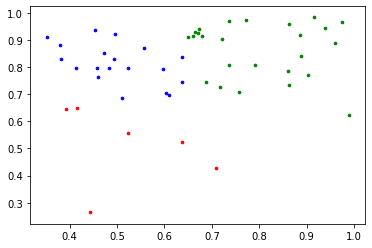

In [0]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
labels_num = [0,1,2]
for i in labels_num:
    points = np.array(df_bbox.loc[df_bbox['labels'] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])